In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np



# Plot different SVM classifiers in the iris dataset

Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.


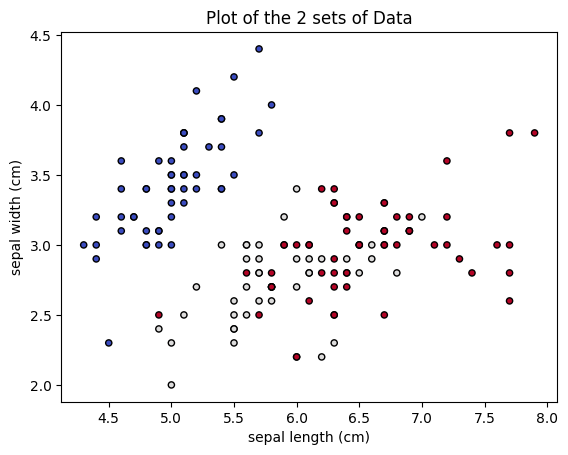

In [3]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
sub.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
sub.set_title("Plot of the 2 sets of Data")
sub.set_xlabel(iris.feature_names[0])
sub.set_ylabel(iris.feature_names[1])

plt.show()

SVC(kernel='linear')
R2 score for SVC with linear kernel is 0.7830188679245282


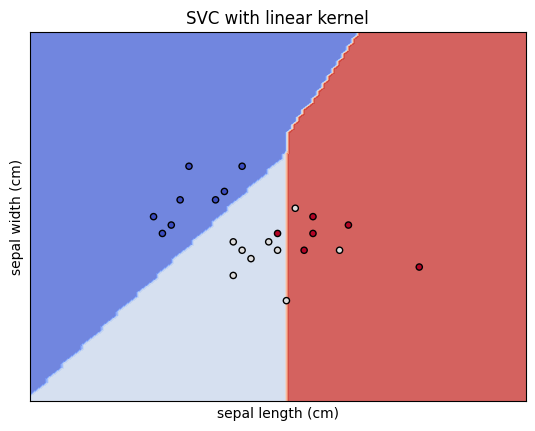

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = svm.SVC(kernel="linear", C=C)
models = models.fit(X_train, y_train)
print(models)
predicted = models.predict(X_test)
# title for the plots
titles = "SVC with linear kernel"

r2_scores = r2_score(y_test, predicted)
print(f"R2 score for {titles} is {r2_scores}")
X0_test, X1_test = X_test[:, 0], X_test[:, 1]

fig, sub = plt.subplots(1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

disp = DecisionBoundaryDisplay.from_estimator(
    models,
    X_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=sub,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
sub.scatter(X0_test, X1_test, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
sub.set_xticks(())
sub.set_yticks(())
sub.set_title(titles)

plt.show()


In [5]:
conf = {}
for j,k in zip(predicted,y_test):
    if f"{j}-{k}" in conf.keys():
        conf[f"{j}-{k}"] += 1
    else:
        conf[f"{j}-{k}"] = 1
#print(confusion_data)
mat_1 = []
for j in range(3):
    mat_2 = []
    for k in range(3):
        if f'{j}-{k}' in conf:
            mat_2 += [conf[f'{j}-{k}']]
        else:
            mat_2 += [0]
    mat_1 += [mat_2]
conf_mat = np.array(mat_1)
print(f"Confusion Matrix of {titles}")
print(conf_mat)


Confusion Matrix of SVC with linear kernel
[[8 0 0]
 [0 7 1]
 [0 2 5]]


In [6]:
def plotting(positive,matrix):

    TP = 0
    TN = 0
    FP = 0
    FN = 0
    shape = np.shape(np.array(matrix))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if i == positive and j == positive:
                TP = matrix[i][j]
            if i == positive and j != i:
                FP += matrix[i][j]
    Precision = TP/(TP+FP)

    for i in range(shape[0]):
        for j in range(shape[1]):
            if j == positive and j != i:
                FN += matrix[i][j]
    Recall = TP/(TP+FN)
    
    Accuracy = sum([matrix[i][i] for i in range(shape[0])])
    Accuracy = Accuracy/np.sum(matrix.flatten())

    print(f"Method:{titles}, Positive : {positive}")
    print(f"Precision is {Precision}")
    print(f"Recall is {Recall}")
    print(f"F1 Score is {2*(Precision*Recall)/(Precision+Recall)}\n")
    return Accuracy
    
    
for k in range(3):        
    Accuracy = plotting(k,conf_mat)
print(f"Accuracy is {Accuracy}\n")


Method:SVC with linear kernel, Positive : 0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0

Method:SVC with linear kernel, Positive : 1
Precision is 0.875
Recall is 0.7777777777777778
F1 Score is 0.823529411764706

Method:SVC with linear kernel, Positive : 2
Precision is 0.7142857142857143
Recall is 0.8333333333333334
F1 Score is 0.7692307692307692

Accuracy is 0.8695652173913043



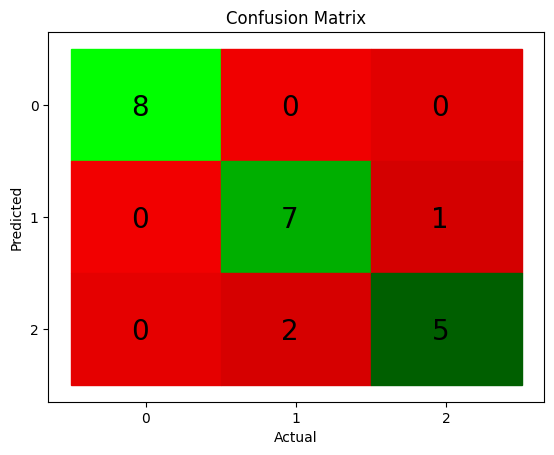

In [7]:
def confusion_plot(matrix):
    fig, ax = plt.subplots(1)
    ax.invert_yaxis()
    shape = np.shape(np.array(matrix))
    ax.set_xticks([i for i in range(shape[0])])
    ax.set_yticks([i for i in range(shape[0])])
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title("Confusion Matrix")
    for i in range(shape[0]):
        for j in range(shape[1]):
            
            if i==j:
                colour_g = str(hex(255-(5*13*i+15*j)%255))[2:]
                colour_r = '00'
            if i!=j:
                colour_r = str(hex(255-(13*i+15*j)%255))[2:]
                colour_g = '00'
            if len(colour_g)==1:
                colour_g = '0'+colour_g
            if len(colour_r)==1:
                colour_r = '0'+colour_r
            colour = '#'+colour_r+colour_g+'00'

            ax.fill([-0.5+j,0.5+j,0.5+j,-0.5+j,-0.5+j],[-0.5+i,-0.5+i,0.5+i,0.5+i,-0.5+i],color = colour)
            ax.text(i-0.1,j+0.1,matrix[i][j],fontsize=20)
    plt.show()
confusion_plot(conf_mat.T)